# 시계열 분석 (예측모델)

## 13.7 시계열 분석 (예측모델)

> 시계열 분석은 관측치의 통계량 변화를 시간의 흐름에 따라 순차적으로 데이터화하고 현황을 모니터링하거나 미래의 수치를 예측하는 분석방법이다 .

### 목적 

1. 탐색 

    외부 인자와 관련된 계절적인 패턴, 추세 등을 설명하고 인과관계를 규명한다.

2. 예측

    과거 데이터 패턴을 통해 미래의 값을 예측한다. 

### 시계열 요소

시계열에서 한 시점의 관측결과 X는 신호와 잡음으로 이루어 져있다 .

|요소|설명|
|--|--|
|수준|  시계열의 평균값|
|추세 | 장기 변동 요인으로써 강한 외부요인이 없는 한 지속되는 경향성 |
| 순환성 | 불규칙적이면서 반복적인 중기 변동요인|
| 계절성 | 1년의 기간동안의 주기적인 패턴 |
| 잡음 | 일정한 규칙정이 없는 무작위적인 변동 |

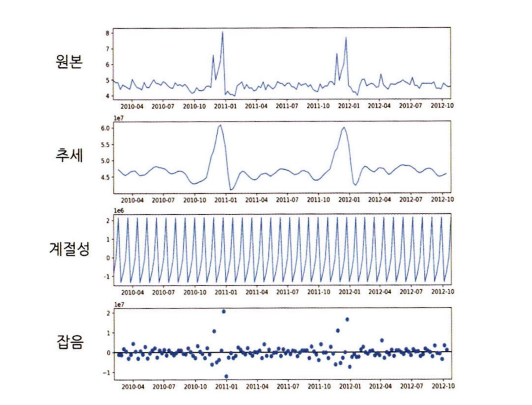


    > 이렇게 시계열 요소를 나누는 것을 시계열 분해라고 함. 
    > 시계열 분해를 통해 숨겨진 요소를 파악하고 분석을 진행해야 예측력을 높일 수 있다. 


### 13.7.1 회귀 기반 시계열 분석

비즈니스 분야에서 주로 사용되는 시계열 분석 기법은 회귀기반 방법과 지수평활법과 ARIMA 모델방법이 있음. 

회귀 기반 모델은 예측하고자 하는 시점의 t의 값이 종속변수가 된다. 그리고 t시점에 해당하는 요소들이 독립변수

    > 해당 시점에 대한 요일이나 월 등에 대한 정보를 독리변수화함으로써 시즌성이나 순환성을 모델에 반영할 수 있음.
    > 추세성을 반영하기 위해서는 시계열이 시작하는 기준 시점일로부터 경과일을 독립변수화 하면 된다. (468페이진데 예시가 이해가 안됨)

비선형적인 경우에는 일반 선형 회귀식으로 표현ㄴ하는 것이 어렵다. 그래서 다항회귀를 하여 모델 적합성을 향상시킬 수 있다. 추세가 지수적으로 증가하는 경우 해당 독립변수에 제곱을 취해 회귀선을 보정해주는 느낌임. 

그리고 종속변수나 독립변수에 로그를 취해주어 비선형적인 관계를 적합시킬 수 있는데, 로그변환을 하기 위해서는 모든 관측치가 0보다 커야함. 만약 0이 포함되어 있으면 log(x+1)과 같은 변환이 필요.

회귀모형기반의 시계열 분석의 장점은 외부요소를 변수로 추가해주는 것이 용이하다. 

ex) 경제지수, 환율, 경쟁지수, 국민 저축률, 출산율 등등 독립변수로 활용할 수 있다. 
    
    + 전달 혹은 전년도 동일 등에 대한 과거 기간의 수치를 독립변수로 넣어주면 추세요소를 보다 정교하게 반영할 수 있다 .

- ACF ( 자기상관함수 )
    자기상관함수인 ACF를 이용하면 시계열 데이터의 주기성을 수치적으로 확인할 수 있고, 특정 시차가 어떠한 영향을 주는지 알 수 있다. 

    ACF는 자기상관함수로써 Y수치와 시점사이의 상관관계를 0.05 유의수준 안에서 나타낸것이다. 

    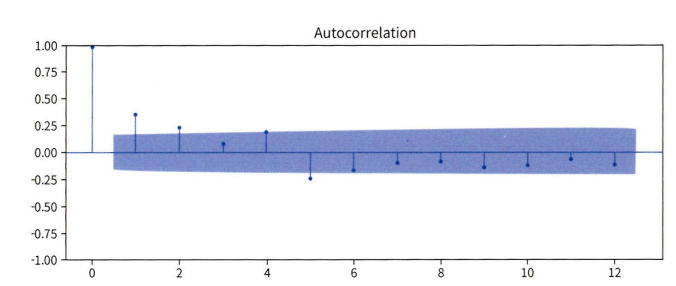

    점선으로 되어있는 가로선을 벗어나면 해당시차가 y값과 상관성이 있다는 것을 의미한다. 선막대가 0보다 크면 양의 상관관계, 작으면 음의 상관관계가 있음.

    1,2와 같은 근접한 시차의 ACF값이 높은 양의 상관성을 갖는것임
- PACF ( 편자기상관함수 )

    Y의 시점과 특정 시점 이외의 모든 시점과의 영향력을 배제한 순수한 영향력을 나타내는 척도.

    다른 시점들과의 다중 공선성을 제거한 단 두 시점과의 관계를 수치화 한것이다. 

    시계열 분석에서는 ACF와 PACF를 같이 봐야한다 .

회귀기반 시계열 분석은 모델 학습과 해석, 예측 방법은 기존의 회귀분석과 동일함. 변수 간 다중 공선성과 유의도를 고려하여 변수 선택을 하고, 계숫값, $R^2$값 등을 통해 모델을 해석하고 튜닝해가면 된다.







### 13.7.2 ARIMA 모델 (Auto Regressive Intergrated Moving Average)

ARIMA는 이동평균을 누적한 자기회귀를 활용하여 시계열 분석을 하는 것이다. 

- 정상성

    정상성은 모든 시점에 대해서 일정한 평균을 갖도록 하는 것. 즉 추세나 계절성이 없는 시계열 데이터로 만들어 주는것이다. 

    + 주의 : 시계열 데이터의 주기성은 정상성과 관련이 없다. >> 주기의 고점이나 지점을 알 수 없고 고정된 길이를 갖고있지 않기 때문이다. 

    정상성을 나타내느 시계열은 평균과 분산이 안정되어 있는 상태
- 차분 

    시계열 데이터에 추세가 있어 평균이 일정하지 않은 경우, 차분을 실시한다. 차분은 연달아 이어진 관측값들의 차이를 계싼하여 그 변화 차이를 제거하는 것이다. 

    1차 차분은 추세만 차분하는 경우, 2차 차분은 계절성도 존재하는 경우이고, 계절차분이라고도 부른다 

- 변환 
    
    시계열 데이터의 분산이 일정하지 않은 경우 변환을 실시함. 

    각 시점의 값에 로그나 루트를 씌어주어 분산의 크기를 완화시켜 주는 것. 
    -> 시점간의 편차를 감소시킴

- AR (자기 회귀)
    자기회귀는 자기 자신에 대한 변수의 회귀라는 뜻임. 
    > 현재시점의 Y값과 시차들간의 관계만으로 시계열 데이터를 분석하는 것을 자기회귀모델이라 한다.
    
        > AR(1) 하나의 시차만 사용하는 경우, AR(3) 세개의 시차를 사용

- MA (이동 평균)

    이동 평균 모델은 추세와 주기를 측정하기 위해 일반적으로 사용하는 이동평균과는 다른 개념임.
    
        시계열 예측 모델로 사용되는 MA 모형은 관측값의 이전 이전 시점의 연속적인 예측오차의 영향을 이용하는 방법

    MA 모델의 예측하고자 하는 Y값은 해당시점의 오차항에 n시점 이전의 오차항에 이동 평균계수를 곱한 값들을 더해 준것이다 .
    
    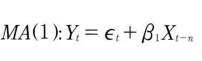


    MA 모델은 이전 시점의 상태를 이용하여 현재를 예측하는 것이 아니라, 이전 시점의 변동값과 오차항을 이용하여 현재상태를 추론한다. 


AR 모델과 MA 모델은 각각 사용하는 시점의 수에 따라 AR(p), MA(q) 모형으로 정의하고, 이 두 모델을 결합하면 ARMA(p,q)모델이 된다. 즉, 과거시점의 수치와 변동성을 모두 활용하여 보다 정교한 예측을 하는 것이다. 

but 보통 시계열 데이터는 추세를 가지고 있으며, 일정한 패턴을 가지고 있지 않은 경우가 많기 떄문에 ARMA로는 부족함.

- ARIMA 
    ARIMA는 과거의 데이터가 가지고 있던 추세까지 반영하는데, 시계열의 비정상성을 설명하기 위해 시점 간 차분을 사용. 

        AR모델의 자기 회귀 부분의 차수, MA모델의 이동평균 부분의 차수, 그리고 1차 차분이 포함된 정도를 포함하여 ARIMA(p,d,q)로 표현한다. 

    - p : AR 모델의 자기회귀 부분의 차수
    - d : 1차 차분이 포함된 정도
    - q : MA 모델의 이동평균 부분의 차수

            ARIMA(p,d,q)모델은 d회만큼 차분 하고, AR(p)모델은 p만큼의 과거 값들과 MA(q) 모델은 q만큼의 과거 오차 값들을 예측에 사용하고, 차분한 값을 다시 원래의 값으로 환산하여 최종 예측값을 산출한다.

            ARIMA(p,d,q) 분석을 할 때는 우선 시각화와 ACF 차트를 통해 데이터의 정상성을 확인하고, ACF, PACF 값을 통해 p값과 q 값을 설정하고 최종 모델을 만든다.

    평가 기준은 RMSE , MAE, MAPE 등의 기준이 사용된다.
    

        
    
    






### 13.7.3 시계열 분석 실습


In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose ## 시계열 분해
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm   # pmdarima 라는 파이썬 라이브러리를 통해 Auto ARIMA를 실시하였습니다
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('walmart_cleaned.csv')
df.head()


,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [4]:
df.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [11]:
## 주별 매출 집계 테이블 생성

# date칼럼 날짜형식 변환

df['Date2'] = pd.to_datetime(df['Date'])

# 날짜 오름차순 정렬

df = df.sort_values(by='Date2')

# 연도 칼럼 생성
df['Year'] = df['Date2'].dt.year

# 집계 칼럼 함수 설정

def func(df) :
    df_sum = {}
    df_sum['Weekly_Sales'] = df['Weekly_Sales'].mean()
    ## 이걸 왜하노 온도인디
    df_sum['Temperature'] = df['Temperature'].mean()
    df_sum['Fuel_Price'] = df['Fuel_Price'].mean()
    df_sum['IsHoliday'] = df['IsHoliday'].mean()
    ## CPI = 소비자물가지수
    ## 평균 소비자 물가지수 구하는것
    df_sum['CPI'] =df["CPI"].mean()
    ## Unemployment Index
    df_sum['Unemployment'] = df['Unemployment'].mean()
    return pd.Series(df_sum,index = ['Weekly_Sales','Temperature','Fuel_Price','IsHoliday','CPI','Unemployment'])
## 근데 왜 합을 구하는지 모르것네 그냥 평균으로 할거임
# 집계테이블

df_agg = df.groupby(['Year','Date2']).apply(func).reset_index()
    
    

In [12]:
df_agg

,Year,Date2,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
0,2010,2010-02-05,16836.121997,33.277942,2.717869,0.0,167.398405,8.576731
1,2010,2010-02-12,16352.056032,33.361810,2.696102,1.0,167.384138,8.567309
2,2010,2010-02-19,16216.658979,37.038310,2.673666,0.0,167.338966,8.576351
3,2010,2010-02-26,14899.549688,38.629563,2.685642,0.0,167.691019,8.561375
4,2010,2010-03-05,15921.015727,42.373998,2.731816,0.0,167.727351,8.572689
...,...,...,...,...,...,...,...,...
138,2012,2012-09-28,14765.327279,68.151759,3.858245,0.0,175.919639,7.225855
139,2012,2012-10-05,15983.413747,65.456811,3.848435,0.0,175.998254,6.942141
140,2012,2012-10-12,15427.596739,57.687284,3.897425,0.0,176.123786,6.952682
141,2012,2012-10-19,15295.732397,60.152756,3.878413,0.0,176.295499,6.948928


Text(0, 0.5, 'salse')

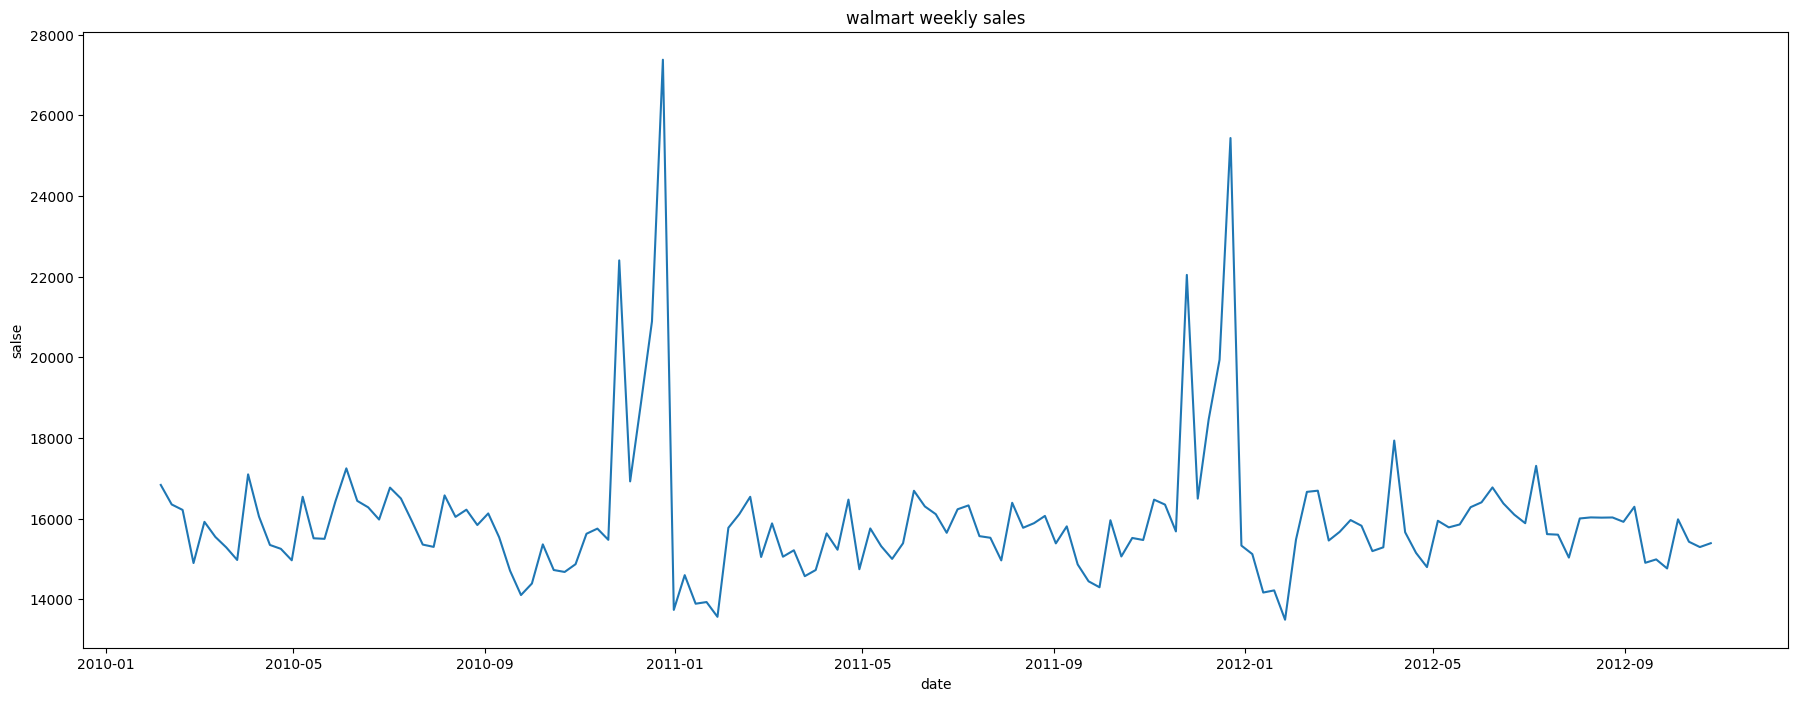

In [14]:
### 정보를 평균값으로 가공 

## 전체 매출 추세 확인

plt.figure(figsize=(22,8))

plt.plot(df_agg.Date2,df_agg.Weekly_Sales)
plt.title('walmart weekly sales')
plt.xlabel('date')
plt.ylabel('salse')
### 연말에 장사 잘됌


In [15]:
## 시계열 분해용 데이터 셋 생성

timeSeries_decomp = df_agg.loc[:,['Date2','Weekly_Sales']]
timeSeries_decomp.index=timeSeries_decomp.Date2
ts_decomp = timeSeries_decomp.drop('Date2',axis=1)

ts_decomp.head()

,Weekly_Sales
Date2,
2010-02-05,16836.121997
2010-02-12,16352.056032
2010-02-19,16216.658979
2010-02-26,14899.549688
2010-03-05,15921.015727


<Figure size 640x480 with 0 Axes>

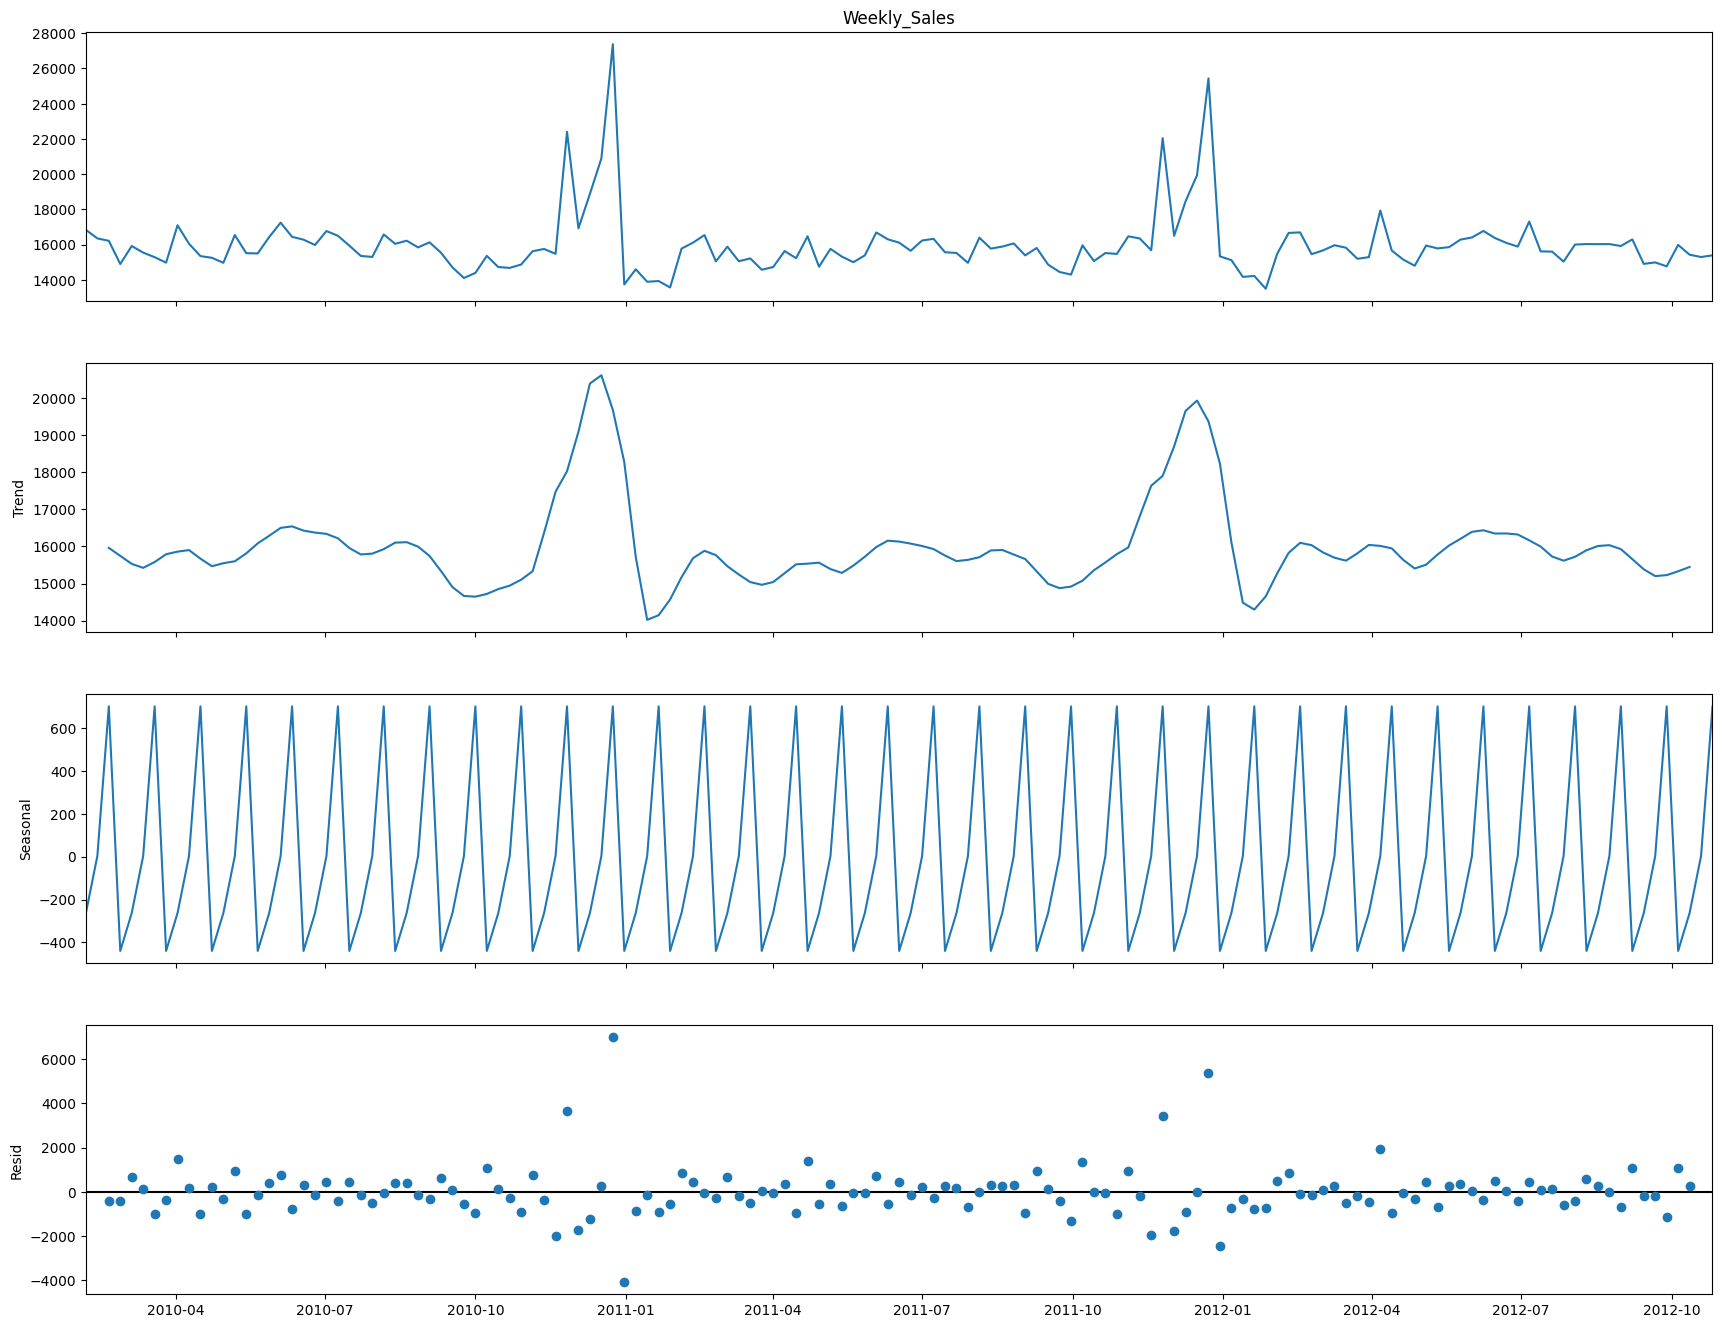

In [17]:
# 시계열 분해 시각화

# period = 월별은 12 , 주별은 4 , 일별은 7

## 근데 여기선 주별로 나누겠다 .
## 가법모델 사용 
## 가법모형은 : 데이터가 선형적이며 독립변수들의 영향이 더해지는 경우 적합하다 .
## 선형 회귀모델은 가법모형의 한 예임.

## 승법모형은 데이터가비선형적이거나 독립 변수 간의 상호작용이 중요한 경우 적합함.
## 시계열 분석에서 계절성 ㅛㅇ소가 곱셈적으로 작용하는 경우 승법모형 사용


## 모델 해석
## 가법 모형 : 가법 모형은 각 독립변수의 형향을 상대적으로 쉽게 해석할 수 있음.
            ## 각 변수의 계수는 해당 변수의 영향을 직접 나타내므로 해석이 용이함.

## 승법모형 : 변수 간의 상호작용을 고려하기 떄문에 변수의 개별 영향을 해석하기 어려울 수 있다.

## 여기서는 그냥 가법모형 ㄱㄱ
## 주별로 분해하겄다.

decomp = seasonal_decompose(ts_decomp['Weekly_Sales'],model='additive',period=4)

fig= plt.figure()
fig = decomp.plot()
fig.set_size_inches(20,15)

plt.show()



     연말에 매출이 급등 + 4주간격으로 오르내린다.

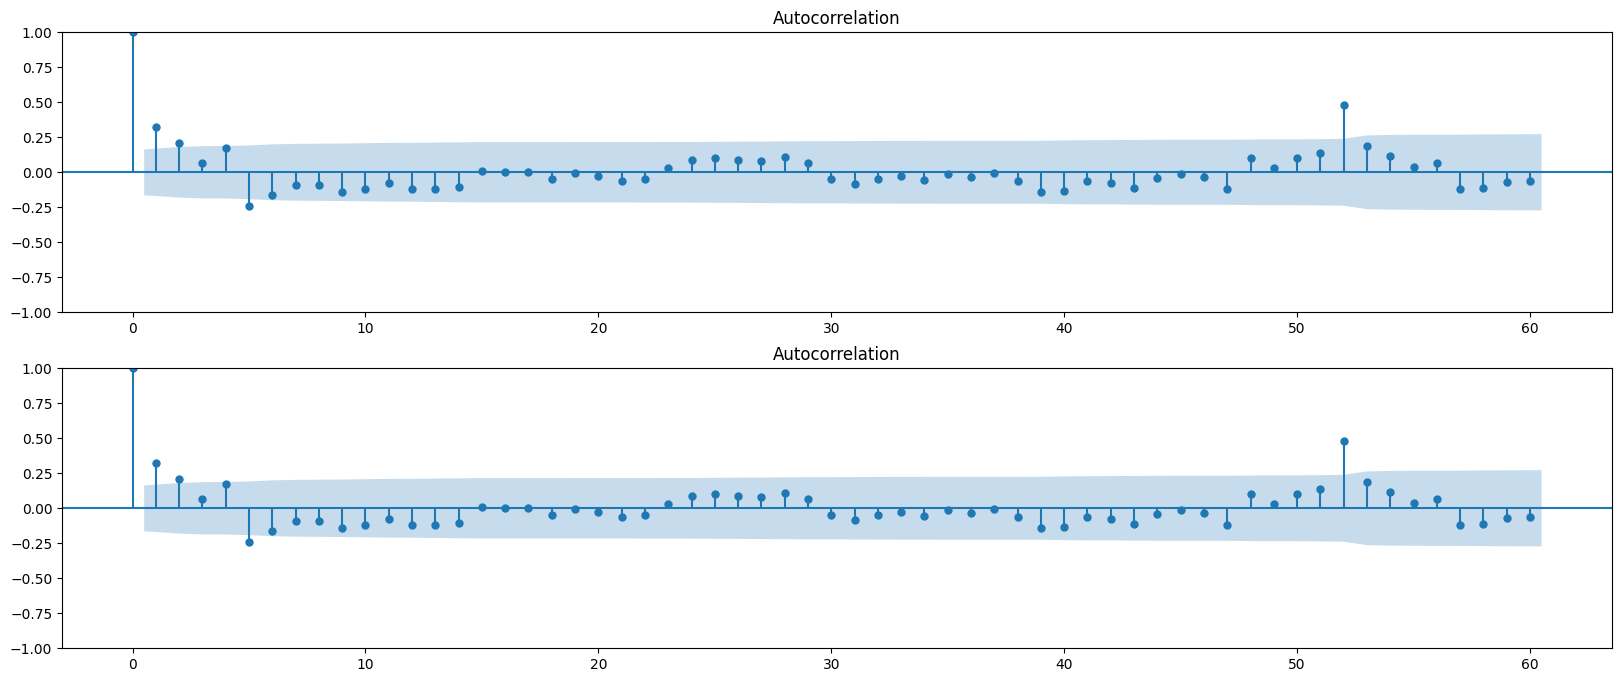

In [18]:
### ACF, PACF 
## 212 211이 뭔지 몰겟음

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_decomp,lags=60,ax=ax1)
# lags :시차(lag)의 최대 수를 지정합니다. ACF를 그릴 때, 얼마나 많은 시차까지 나타낼지 결정합니다
ax2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_decomp,lags=60,ax=ax2)



In [28]:
## 회귀모델용 데이터셋 가공

# 1~4 , 52주 전 시점 파생변수 생성 
# shift메서드는 시계열 데이터의 데이터나 인덱스를 원하는 기간만큼 쉬프트 하는 메서드 입니다.
## 특정 기간만큼 미루는것

## 1~4 52주전 시점 파생변수 생성
df_agg['Weekly_Sales_1w'] = df_agg['Weekly_Sales'].shift(1)
df_agg['Weekly_Sales_2w'] = df_agg['Weekly_Sales'].shift(2)
df_agg['Weekly_Sales_3w'] = df_agg['Weekly_Sales'].shift(3)
df_agg['Weekly_Sales_4w'] = df_agg['Weekly_Sales'].shift(4)
df_agg['Weekly_Sales_52w'] = df_agg['Weekly_Sales'].shift(52)



In [29]:
## 모델용 데이터셋 기간 설정
df_agg_set = df_agg[df_agg['Date2'].isin(pd.date_range('2011-02-05','2012-10-26'))]

# 독립변수 종속변수 분리

df_x = df_agg_set.drop(['Year','Date2','Weekly_Sales'],axis=1)
df_y = df_agg_set[['Weekly_Sales']]

## 학습셋과 테스트셋 분리해서 생성

x_train, x_test, y_train,y_test = train_test_split(df_x,df_y,test_size=0.4,random_state= 451)

print(len(x_train))
print(len(x_test))

54
36


In [33]:
x_test.head()

,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment,Weekly_Sales_1w,Weekly_Sales_2w,Weekly_Sales_3w,Weekly_Sales_4w,Weekly_Sales_52w
106,39.593755,3.562798,0.0,174.356066,7.485977,16664.247891,15480.553608,13494.232612,14221.357405,16541.991212
58,52.368406,3.578120,0.0,170.107893,8.249062,15056.450540,15882.557045,15049.747558,16541.991212,15286.773578
107,44.493671,3.619105,0.0,174.277162,7.485164,16693.401051,16664.247891,15480.553608,13494.232612,15049.747558
73,78.201634,3.678057,0.0,171.075955,8.057111,15649.418342,16111.226407,16302.918830,16691.305332,16769.792424
91,48.547756,3.522757,0.0,172.730140,7.766876,15470.924781,15521.325691,15062.736015,15960.678959,15625.249792


In [34]:

## 다중 회귀모델 생성
# fit_intercept :fit_intercept=True (기본값): 모델이 절편을 포함하여 학습합니다. 즉, 모델은 종속 변수와 독립 변수 간의 관계를 y 절편(절편을 포함한 직선)을 통해 설명하려고 시도합니다.

mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train,y_train)
## 테스트 셋에 모델적용

y_predict = mreg.predict(x_test)

# 모델 성능 확인
print('학습셋 R-square : {:.5f}'.format(mreg.score(x_train,y_train)))
print('테스트 R-square : {:.5f}'.format(mreg.score(x_test,y_test)))

## 테스트 R-square ...? 과적합 오짐



학습셋 R-square : 0.95978
테스트 R-square : 0.34588


In [35]:
## 모델 상세확인
ols_m = sm.OLS(y_train,sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     102.6
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.17e-26
Time:                        20:46:57   Log-Likelihood:                -393.92
No. Observations:                  54   AIC:                             809.8
Df Residuals:                      43   BIC:                             831.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.463e+04   3.01e+04     -0.486      0.629   -7.54e+04    4.61e+04
Temperature          1.7486      4.367      0.400      0.691      -7.058      10.555
Fuel_Price        -919.4144    346.313     -2.655      0.011   -1617.822    -221.007
IsHoliday          417.2727    216.579      1.927      0.061     -19.501     854.046
CPI                115.0593    145.664      0.790      0.434    -178.700     408.819
Unemployment       178.6893    769.670      0.232      0.818   -1373.498    1730.877
Weekly_Sales_1w      0.0271      0.040      0.683      0.498      -0.053       0.107
Weekly_Sales_2w     -0.0039      0.050     -0.077      0.939      -0.105       0.098
Weekly_Sales_3w     -0.0356      0.040     -0.894      0.376      -0.116       0.045
Weekly_Sales_4w      0.0087      0.066      0.131      0.896      -0.125       0.142
Weekly_Sales_52w     0.7881      0.035     22.642      0.000       0.718       0.858
==============================================================================
Omnibus:                        1.792   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.053
Skew:                          -0.300   Prob(JB):                        0.591
Kurtosis:                       3.329   Cond. No.                     1.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""